<a href="https://colab.research.google.com/github/porori1224/2024_Chosun_osp_Deepfake-detection-Challenge/blob/porori1224/After_2nd_Mentoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
import os
# check the current path
print(os.getcwd()) # /content

# You should copy the path : 왼쪽 폴더에서 오른쪽 버튼 후 경로복사
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW')

print(os.getcwd()) # path has been changed

/content
/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW


In [4]:
!pip install retina-face

In [24]:
!pip install torch torchvision torchaudio

In [6]:
# 필요시 설치
!pip install scikit-learn matplotlib

In [ ]:
!pip install timm

In [8]:
import pandas as pd
import json

# JSON 파일 경로
json_file = "/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/00~01/dfdc_train_part_0/metadata.json"

# JSON 파일 로드
with open(json_file, "r") as f:
    metadata = json.load(f)

# JSON 데이터를 데이터프레임으로 변환
df = pd.DataFrame.from_dict(metadata, orient="index").reset_index()
df.columns = ["filename", "label", "split", "original"]

# 라벨링을 0과 1로 매핑
df["label"] = df["label"].map({"FAKE": 0, "REAL": 1})

# 데이터프레임에서 필요한 컬럼만 출력하도록 정리
print(df[["filename", "label", "split", "original"]].head(10))

         filename  label  split        original
0  owxbbpjpch.mp4      0  train  wynotylpnm.mp4
1  vpmyeepbep.mp4      1  train             NaN
2  fzvpbrzssi.mp4      1  train             NaN
3  htorvhbcae.mp4      0  train  wclvkepakb.mp4
4  fckxaqjbxk.mp4      0  train  vpmyeepbep.mp4
5  sphirandia.mp4      0  train  jawgcggquk.mp4
6  vsmadeuczx.mp4      0  train  qarqtkvgby.mp4
7  ohaqlzfnuv.mp4      0  train  sttnfyptum.mp4
8  komngcqveq.mp4      0  train  kqlvggiqee.mp4
9  iafvzgpbix.mp4      0  train  lzbmwwejxb.mp4


In [9]:
# JSON 파일 로드 확인
print(f"Metadata loaded: {len(metadata)} records")
print(list(metadata.keys())[:5])  # JSON 데이터 키 확인

# 데이터프레임 형식 확인
print(df.head())

# 필터링 조건 확인
filtered_df = df[df["filename"].str.startswith(("00"))]
print(f"Filtered DataFrame size after filter: {len(filtered_df)}")
print(filtered_df.head())

Metadata loaded: 1334 records
['owxbbpjpch.mp4', 'vpmyeepbep.mp4', 'fzvpbrzssi.mp4', 'htorvhbcae.mp4', 'fckxaqjbxk.mp4']
         filename  label  split        original
0  owxbbpjpch.mp4      0  train  wynotylpnm.mp4
1  vpmyeepbep.mp4      1  train             NaN
2  fzvpbrzssi.mp4      1  train             NaN
3  htorvhbcae.mp4      0  train  wclvkepakb.mp4
4  fckxaqjbxk.mp4      0  train  vpmyeepbep.mp4
Filtered DataFrame size after filter: 0
Empty DataFrame
Columns: [filename, label, split, original]
Index: []


In [10]:
import os
import pandas as pd
import json

# JSON 파일 경로 (dfdc_train_part_0 사용)
json_file = "/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/00~01/dfdc_train_part_0/metadata.json"

# JSON 파일 로드
with open(json_file, "r") as f:
    metadata = json.load(f)

# JSON 데이터를 데이터프레임으로 변환
df = pd.DataFrame.from_dict(metadata, orient="index").reset_index()
df.columns = ["filename", "label", "split", "original"]

# 라벨링을 0과 1로 매핑
df["label"] = df["label"].map({"FAKE": 0, "REAL": 1})

# 데이터프레임에서 필요한 컬럼만 출력하도록 정리
print(f"Total data size: {len(df)}")
print(df[["filename", "label", "split", "original"]].head(10))

# 비디오 파일 경로 생성 (dfdc_train_part_0 경로)
base_dir = "/content/gdrive/MyDrive/Colab Notebooks/2024_OSP_SW/00~02/dfdc_train_part_0"
df["filepath"] = df["filename"].apply(lambda x: os.path.join(base_dir, x))

# 데이터 크기 확인
print(f"Filtered DataFrame size: {len(df)}")
print(df["label"].value_counts())  # 각 클래스별 데이터 수 확인

# 데이터 분리 (80% Train + Validation, 20% Test)
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["label"])
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42, stratify=train_val_df["label"])

# 분리된 데이터 크기 확인
print(f"Train DataFrame size: {len(train_df)}")
print(f"Validation DataFrame size: {len(val_df)}")
print(f"Test DataFrame size: {len(test_df)}")

# CSV 파일로 저장
private_dir = "/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW"
os.makedirs(private_dir, exist_ok=True)

train_csv_path = os.path.join(private_dir, "train_split.csv")
val_csv_path = os.path.join(private_dir, "val_split.csv")
test_csv_path = os.path.join(private_dir, "test_split.csv")

train_df.to_csv(train_csv_path, index=False)
val_df.to_csv(val_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

print(f"Train CSV saved to: {train_csv_path}")
print(f"Validation CSV saved to: {val_csv_path}")
print(f"Test CSV saved to: {test_csv_path}")

Total data size: 1334
         filename  label  split        original
0  owxbbpjpch.mp4      0  train  wynotylpnm.mp4
1  vpmyeepbep.mp4      1  train             NaN
2  fzvpbrzssi.mp4      1  train             NaN
3  htorvhbcae.mp4      0  train  wclvkepakb.mp4
4  fckxaqjbxk.mp4      0  train  vpmyeepbep.mp4
5  sphirandia.mp4      0  train  jawgcggquk.mp4
6  vsmadeuczx.mp4      0  train  qarqtkvgby.mp4
7  ohaqlzfnuv.mp4      0  train  sttnfyptum.mp4
8  komngcqveq.mp4      0  train  kqlvggiqee.mp4
9  iafvzgpbix.mp4      0  train  lzbmwwejxb.mp4
Filtered DataFrame size: 1334
label
0    1248
1      86
Name: count, dtype: int64
Train DataFrame size: 853
Validation DataFrame size: 214
Test DataFrame size: 267
Train CSV saved to: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/train_split.csv
Validation CSV saved to: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/val_split.csv
Test CSV saved to: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/test_split.csv


In [11]:
import pandas as pd
from sklearn.utils import resample

# 기존 데이터프레임 로드 (예: df)
fake_df = df[df['label'] == 0]
real_df = df[df['label'] == 1]

# Fake 데이터를 Real 데이터와 동일한 개수로 샘플링
fake_sampled = resample(fake_df, replace=False, n_samples=len(real_df), random_state=42)

# Fake와 Real 데이터를 결합
balanced_df = pd.concat([real_df, fake_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# 업데이트된 데이터 크기 출력
print(f"Balanced dataset size: {len(balanced_df)}")
print(balanced_df['label'].value_counts())

Balanced dataset size: 172
label
1    86
0    86
Name: count, dtype: int64


In [ ]:
import os
import cv2
from retinaface import RetinaFace
from multiprocessing import Pool

# 경로 설정
input_dir = "/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/00~01/dfdc_train_part_0"
output_dir = "/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos"
os.makedirs(output_dir, exist_ok=True)

# 스킵된 비디오 기록
skipped_videos = set()  # 중복 방지

# 비디오 처리 함수
def process_video(video_info):
    video_path, output_path = video_info
    try:
        # 비디오 파일 열기
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Skipping invalid video: {video_path}")
            skipped_videos.add(video_path)
            return None

        # 프레임 읽기
        frames = []
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frames.append(frame)
        cap.release()

        if len(frames) == 0:
            print(f"Skipping empty video: {video_path}")
            skipped_videos.add(video_path)
            return None

        # 여러 프레임 선택 (중간 프레임 + 랜덤 프레임)
        frame_candidates = [frames[len(frames) // 2]]  # 중간 프레임 추가
        if len(frames) > 1:
            frame_candidates.append(frames[len(frames) // 3])  # 1/3 위치 프레임 추가

        # 해상도 축소 및 얼굴 감지 시도
        for frame in frame_candidates:
            frame_resized = cv2.resize(frame, (160, 90))  # 낮은 해상도로 축소
            faces = RetinaFace.detect_faces(frame_resized)
            if isinstance(faces, dict) and len(faces) > 0:
                # 얼굴 크롭
                bbox = list(faces.values())[0]["facial_area"]
                cropped_face = frame_resized[bbox[1]:bbox[3], bbox[0]:bbox[2]]
                os.makedirs(os.path.dirname(output_path), exist_ok=True)  # 경로 생성
                cv2.imwrite(output_path, cropped_face)
                print(f"Processed and saved: {output_path}")
                return output_path

        # 얼굴 감지 실패 시
        print(f"Skipping video without detectable faces: {video_path}")
        skipped_videos.add(video_path)
        return None

    except FileNotFoundError:
        print(f"File not found: {video_path}")
        skipped_videos.add(video_path)
        return None
    except Exception as e:
        print(f"Unexpected error processing {video_path}: {e}")
        skipped_videos.add(video_path)
        return None

# 비디오 정보 리스트 생성
video_info_list = [
    (os.path.join(input_dir, filename), os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_processed.jpg"))
    for filename in os.listdir(input_dir) if filename.endswith(".mp4")
]

# 병렬 처리 함수
def process_videos_in_parallel(video_info_list, num_processes=os.cpu_count()):  # CPU 코어 수 사용
    with Pool(processes=num_processes) as pool:
        results = pool.map(process_video, video_info_list)
    return results

# 실행
print("Starting optimized video processing...")
processed_files = process_videos_in_parallel(video_info_list, num_processes=4)  # 프로세스 수 조정 가능
print("Processing complete.")

# 스킵된 비디오 저장
skipped_videos_path = "/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/skipped_videos.txt"
with open(skipped_videos_path, "w") as f:
    for video in skipped_videos:
        f.write(f"{video}\n")
print(f"Skipped videos saved to: {skipped_videos_path}")

Starting optimized video processing...
24-11-29 04:38:37 - Directory /root/.deepface/weights created
24-11-29 04:38:37 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
24-11-29 04:38:37 - Directory /root/.deepface created
24-11-29 04:38:37 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
24-11-29 04:38:37 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
24-11-29 04:38:37 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: Downloading...
https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5From:
 To: /root/.deepface/weights/retinaface.h5
https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
  0%|          | 0.00/119M [00:00<?, ?B/s]Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
  0%|          | 0.00/119M [00:00<?, ?B/s]Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:00<00:00, 189MB/s] 
100%|██████████| 119M/119M [00:00<00:00, 188MB/s]
100%|██████████| 119M/119M [00:00<00:00, 196MB/s]
100%|██████████| 119M/119M [00:00<00:00, 188MB/s]


Processed and saved: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos/bmhghysucl_processed.jpg
Processed and saved: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos/xewwsdhdro_processed.jpg
Processed and saved: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos/yajhwipypq_processed.jpg
Skipping video without detectable faces: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/00~01/dfdc_train_part_0/yptchajnvb.mp4
Processed and saved: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos/udxqbhgvvx_processed.jpg
Processed and saved: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos/itwvssoevj_processed.jpg
Processed and saved: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos/jphmkhpoeb_processed.jpg
Skipping video without detectable faces: /content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/00~01/dfdc_train_part_0/culaevxduf.mp4
Processed and saved: /content/gdrive/MyDrive/Colab Not

In [12]:
# processed_dir 변수 정의
processed_dir = "/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos"

# processed_dir 내 파일 가져오기
processed_files = set(os.listdir(processed_dir))

# 파일 이름 매핑 함수 정의
def match_filename(filename, processed_files):
    base_filename = os.path.splitext(filename)[0]
    processed_filename = f"{base_filename}_processed.jpg"
    return processed_filename if processed_filename in processed_files else None

# Train 데이터 파일명과 라벨 매핑 생성
train_labels = {
    match_filename(filename, processed_files): label
    for filename, label in zip(train_df["filename"], train_df["label"])
    if match_filename(filename, processed_files) is not None
}

# Test 데이터 파일명과 라벨 매핑 생성
test_labels = {
    match_filename(filename, processed_files): label
    for filename, label in zip(test_df["filename"], test_df["label"])
    if match_filename(filename, processed_files) is not None
}

# 결과 확인
print(f"Train Labels Count: {len(train_labels)}")
print(f"Test Labels Count: {len(test_labels)}")


Train Labels Count: 853
Test Labels Count: 188


In [13]:
# train_labels와 test_labels의 개수 확인
print(f"Train Labels Count: {len(train_labels)}")
print(f"Test Labels Count: {len(test_labels)}")

# train_labels의 키 출력
if len(train_labels) == 0:
    print("Train Labels is empty!")
else:
    print(f"Sample Train Label: {list(train_labels.keys())[:5]}")

# test_labels의 키 출력
if len(test_labels) == 0:
    print("Test Labels is empty!")
else:
    print(f"Sample Test Label: {list(test_labels.keys())[:5]}")

Train Labels Count: 853
Test Labels Count: 188
Sample Train Label: ['qnxnrzonvv_processed.jpg', 'jccvzepxjn_processed.jpg', 'bwsytelwkm_processed.jpg', 'tmgdhykjbo_processed.jpg', 'dahvuijxob_processed.jpg']
Sample Test Label: ['zrueallpey_processed.jpg', 'yhbpxjcglo_processed.jpg', 'dtwxxkuvox_processed.jpg', 'wxzekbdrqk_processed.jpg', 'wclvkepakb_processed.jpg']


In [14]:
# train_df와 test_df 데이터 확인
print("Train DataFrame Sample:")
print(train_df.head())

print("\nTest DataFrame Sample:")
print(test_df.head())

Train DataFrame Sample:
            filename  label  split        original  \
880   qnxnrzonvv.mp4      0  train  hsbwhlolsn.mp4   
1323  jccvzepxjn.mp4      0  train  vmxfwxgdei.mp4   
1039  bwsytelwkm.mp4      0  train  fsaronfupy.mp4   
1211  tmgdhykjbo.mp4      0  train  ddtbarpcgo.mp4   
407   dahvuijxob.mp4      0  train  ddtbarpcgo.mp4   

                                               filepath  
880   /content/gdrive/MyDrive/Colab Notebooks/2024_O...  
1323  /content/gdrive/MyDrive/Colab Notebooks/2024_O...  
1039  /content/gdrive/MyDrive/Colab Notebooks/2024_O...  
1211  /content/gdrive/MyDrive/Colab Notebooks/2024_O...  
407   /content/gdrive/MyDrive/Colab Notebooks/2024_O...  

Test DataFrame Sample:
            filename  label  split        original  \
300   zrueallpey.mp4      0  train  xjzkfqddyk.mp4   
552   yhbpxjcglo.mp4      0  train  wclvkepakb.mp4   
661   dtwxxkuvox.mp4      0  train  upmgtackuf.mp4   
857   wxzekbdrqk.mp4      0  train  jytrvwlewz.mp4   
1159  xht

Train Labels Count: 110
Training Ensemble Model with Visualization...
24-11-30 08:27:05 - Directory /root/.deepface created
24-11-30 08:27:05 - Directory /root/.deepface/weights created
24-11-30 08:27:05 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:00<00:00, 202MB/s]


Ensemble Epoch 1/10 - Train Loss: 0.7073
Ensemble Epoch 2/10 - Train Loss: 0.6941
Ensemble Epoch 3/10 - Train Loss: 0.6850
Ensemble Epoch 4/10 - Train Loss: 0.6862
Ensemble Epoch 5/10 - Train Loss: 0.6791
Ensemble Epoch 6/10 - Train Loss: 0.6732
Ensemble Epoch 7/10 - Train Loss: 0.6667
Ensemble Epoch 8/10 - Train Loss: 0.6573
Ensemble Epoch 9/10 - Train Loss: 0.6465
Ensemble Epoch 10/10 - Train Loss: 0.6371


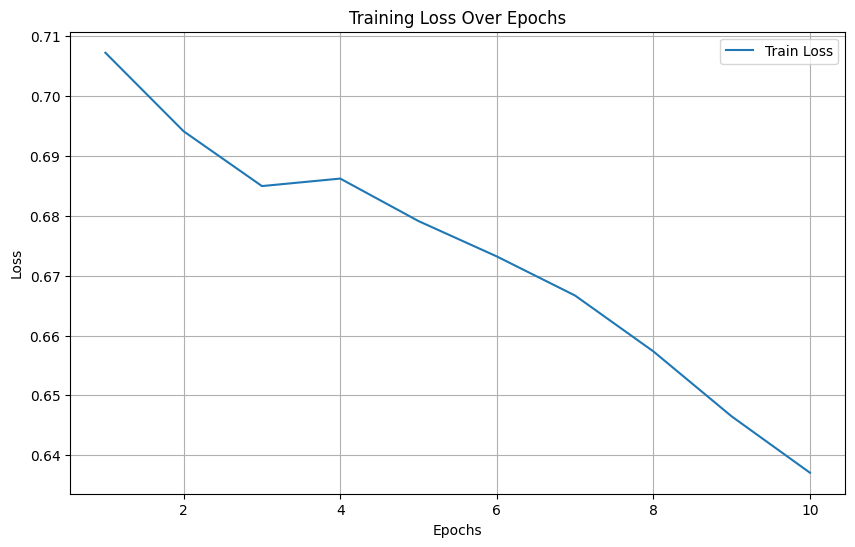

In [18]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.utils import resample
from timm import create_model
from retinaface import RetinaFace
import matplotlib.pyplot as plt

# 데이터셋 클래스 정의
class ProcessedDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None, apply_retinaface=False):
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_files = list(labels.keys())
        self.apply_retinaface = apply_retinaface

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        label = self.labels[image_file]
        image_path = os.path.join(self.image_dir, image_file)
        image = Image.open(image_path).convert("RGB")

        if self.apply_retinaface:
            faces = RetinaFace.extract_faces(img_path=image_path, align=True)
            if faces:
                image = Image.fromarray(faces[0])

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

# 데이터 경로 및 CSV 파일 설정
processed_dir = "/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos"
train_csv = "/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/train_split.csv"

# CSV 파일 로드
train_df = pd.read_csv(train_csv)

# Fake와 Real 데이터 균형 맞추기
fake_df = train_df[train_df['label'] == 0]
real_df = train_df[train_df['label'] == 1]
fake_sampled = resample(fake_df, replace=False, n_samples=len(real_df), random_state=42)
balanced_train_df = pd.concat([real_df, fake_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# 파일명과 라벨 매핑 생성 함수
def create_labels(df, processed_files):
    labels = {}
    for filename, label in zip(df["filename"], df["label"]):
        base_filename = os.path.splitext(filename)[0]
        processed_filename = f"{base_filename}_processed.jpg"
        if processed_filename in processed_files:
            labels[processed_filename] = label
    return labels

# processed_dir 내 파일 가져오기
processed_files = set(os.listdir(processed_dir))
train_labels = create_labels(balanced_train_df, processed_files)

# 데이터 검증
print(f"Train Labels Count: {len(train_labels)}")

# 이미지 전처리(transformations)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 및 DataLoader 생성
train_dataset = ProcessedDataset(processed_dir, train_labels, transform=transform, apply_retinaface=True)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# EfficientNet-B0 정의
class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])
        x = torch.nn.functional.normalize(x, p=2, dim=1)
        x = self.fc(x)
        return x

# ConvNextTiny 정의
class CustomConvNextTiny(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomConvNextTiny, self).__init__()
        self.backbone = create_model("convnext_tiny", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(768, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])
        x = torch.nn.functional.normalize(x, p=2, dim=1)
        x = self.fc(x)
        return x

# EfficientNet-B0 및 ConvNextTiny 초기화
efficientnet_b0 = CustomEfficientNetB0(pretrained=True)
convnext_tiny = CustomConvNextTiny(pretrained=True)

# EfficientNet-B0 + ConvNextTiny 앙상블 모델 정의
class EnsembleModel(nn.Module):
    def __init__(self, model1, model2, num_classes=1):
        super(EnsembleModel, self).__init__()
        self.model1 = model1
        self.model2 = model2
        self.fc = nn.Linear(num_classes * 2, num_classes)

    def forward(self, x):
        output1 = self.model1(x)
        output2 = self.model2(x)
        combined = torch.cat((output1, output2), dim=1)
        return self.fc(combined)

ensemble_model = EnsembleModel(efficientnet_b0, convnext_tiny)

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()
optimizer_ensemble = optim.Adam(ensemble_model.parameters(), lr=1e-4, weight_decay=1e-4)

# 학습 및 시각화 함수
def train_ensemble_with_visualization(model, optimizer, train_loader, num_epochs):
    train_losses = []
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            outputs = model(images)
            optimizer.zero_grad()
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        print(f"Ensemble Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}")

    # 학습 손실 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
    plt.title("Training Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# 학습 실행 및 시각화
print("Training Ensemble Model with Visualization...")
train_ensemble_with_visualization(ensemble_model, optimizer_ensemble, train_loader, num_epochs=10)

In [22]:
# Test 데이터셋 정의
test_dataset = ProcessedDataset(
    processed_dir,
    test_labels,  # Test 데이터의 라벨
    transform=transform,  # 이미지 전처리
    apply_retinaface=True
)

# Test DataLoader 정의
test_loader = DataLoader(
    test_dataset,
    batch_size=16,
    shuffle=False
)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 실제 라벨 리스트 및 모델 예측 리스트 초기화
y_true = []
y_pred = []

# Test 데이터셋을 사용한 평가
with torch.no_grad():
    for images, labels in test_loader:
        # 실제 라벨 저장
        y_true.extend(labels.tolist())

        # 모델 예측
        outputs = ensemble_model(images)
        preds = (torch.sigmoid(outputs).cpu().numpy() > 0.5).astype(int)
        y_pred.extend(preds.flatten().tolist())

# 성능 지표 계산
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)

# 결과 출력
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 65.96%
Precision: 11.94%
Recall: 61.54%
F1 Score: 20.00%


In [25]:
# processed_dir 변수 정의
processed_dir = "/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/processed_videos"

# processed_dir 내 파일 가져오기
processed_files = set(os.listdir(processed_dir))

# 파일 이름 매핑 함수 정의
def match_filename(filename, processed_files):
    base_filename = os.path.splitext(filename)[0]
    processed_filename = f"{base_filename}_processed.jpg"
    return processed_filename if processed_filename in processed_files else None

# Train 데이터 파일명과 라벨 매핑 생성
train_labels = {
    match_filename(filename, processed_files): label
    for filename, label in zip(train_df["filename"], train_df["label"])
    if match_filename(filename, processed_files) is not None
}

# Test 데이터 파일명과 라벨 매핑 생성
test_labels = {
    match_filename(filename, processed_files): label
    for filename, label in zip(test_df["filename"], test_df["label"])
    if match_filename(filename, processed_files) is not None
}

# 결과 확인
print(f"Train Labels Count: {len(train_labels)}")
print(f"Test Labels Count: {len(test_labels)}")


Train Labels Count: 853
Test Labels Count: 188


In [26]:
# Test 데이터 경로 및 CSV 파일 설정
test_csv = "/content/gdrive/MyDrive/Colab Notebooks/KMS_OSP_SW/test_split.csv"

# CSV 파일 로드
test_df = pd.read_csv(test_csv)

# Test 데이터셋 라벨 생성
test_labels = create_labels(test_df, processed_files)

# Test 데이터셋 및 DataLoader 정의
test_dataset = ProcessedDataset(
    processed_dir,
    test_labels,
    transform=transform,
    apply_retinaface=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=16,
    shuffle=False
)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_ensemble_model(model, test_loader):
    model.eval()  # 평가 모드
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            # 모델 예측
            outputs = model(images)
            preds = (torch.sigmoid(outputs).numpy() > 0.5).astype(int)

            # 실제 라벨 및 예측 라벨 저장
            y_true.extend(labels.tolist())
            y_pred.extend(preds.flatten().tolist())

    # 성능 지표 계산
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    # 결과 출력
    print(f"Test Accuracy: {accuracy*100:.2f}%")
    print(f"Test Precision: {precision*100:.2f}%")
    print(f"Test Recall: {recall*100:.2f}%")
    print(f"Test F1 Score: {f1*100:.2f}%")

# Test 데이터로 모델 평가
print("Evaluating Ensemble Model on Test Data...")
evaluate_ensemble_model(ensemble_model, test_loader)

Evaluating Ensemble Model on Test Data...
Test Accuracy: 71.81%
Test Precision: 14.29%
Test Recall: 61.54%
Test F1 Score: 23.19%
